# Predicting High-Traffic Recipes for Increased User Engagement

##1. Introduction

### Project Overview
Tasty Bytes, a recipe discovery platform that began during the COVID-19 pandemic, has grown into a full-fledged business offering personalized meal plans and ingredient delivery. The company aims to increase user engagement and subscription rates by featuring high-traffic recipes on its homepage. The primary objective of this project is to develop a predictive model that can identify which recipes will generate high traffic when featured, thereby optimizing the website's content to drive more user interaction and subscriptions.

To achieve this, the project involves analyzing the dataset of recipes, developing predictive models, and evaluating them using metrics such as Recall and F1 Score. The ultimate goal is to correctly predict high-traffic recipes by at least 80%, ensuring that the homepage consistently showcases popular recipes that attract more visitors to the site.

### Objectives
The key objectives of this project are as follows:

* **Predict Recipe Popularity**: Develop a predictive model that accurately identifies which recipes will lead to high traffic on the website.

* **Achieve High Prediction Accuracy**: Ensure that the model can correctly predict high-traffic recipes with at least 80% accuracy.

* **Optimize Homepage Content**: Use the model's predictions to feature recipes on the homepage that are likely to drive higher user engagement and subscriptions.

* **Evaluate Model Performance**: Assess the model using relevant metrics, including Recall and F1 Score, to ensure it balances between identifying popular recipes and minimizing the risk of featuring less popular ones.

* **Provide Business Recommendations**: Based on the model's performance and findings, recommend strategies for content selection, model fine-tuning, and performance monitoring.

### Dataset Description
The dataset provided for this project can be downloaded using the following link: https://www.kaggle.com/datasets/nourelimane/recipe-site-traffic-2212

It includes several key features related to the recipes available on the Tasty Bytes platform. These features are essential for building and evaluating the predictive model. The dataset contains the following columns:

* **recipe**: A unique numeric identifier assigned to each recipe.
* **calories**: The total number of calories per serving in the recipe, indicating its energy content.
* **carbohydrate**: The amount of carbohydrates (in grams) per serving in the recipe.
* **sugar**: The amount of sugar (in grams) per serving in the recipe.
* **protein**: The amount of protein (in grams) per serving in the recipe.
* **category**: A categorical variable representing the type of recipe, categorized into one of ten possible groupings such as 'Lunch/Snacks,' 'Desserts,' 'Vegetable,' etc.
* **servings**: The number of servings that the recipe yields, indicating portion size.
* **high_traffic**: A categorical variable indicating whether the recipe led to high traffic on the website when it was featured, marked as "High" for high traffic and a missing value otherwise.

The data required thorough cleaning and validation due to missing values and inconsistencies. The cleaned dataset was then used for exploratory analysis and model development to predict the likelihood of a recipe generating high traffic on the Tasty Bytes platform.

##2. Dataset Loading and Overview

### Importing Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

### Load the Dataset into a Pandas DataFrame

In [37]:
dataset = pd.read_csv('recipe_site_traffic_2212.csv')

### Data Overview

In [38]:
dataset.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


### Dimensions of the Dataset

In [39]:
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} features (columns) in the dataset.")

There are 947 rows and 8 features (columns) in the dataset.


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


### Statistical Summary of the Dataset

In [41]:
dataset.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


Observations:

* The dataset consists of 947 entries.
* There are 8 columns in total.
* These columns are a mix of numerical (int64 and float64) and categorical (object) data types.
* There are missing values in almost every column, which will be dealt with in the data validation phase.

##3. Exploring the Columns of the Dataset

### 'recipe' Column

In [42]:
dataset['recipe'].nunique()

947

As there are 947 rows in the dataset, hence this validates that each recipe has a unique ID and there are no duplicates.

### 'calories' Column

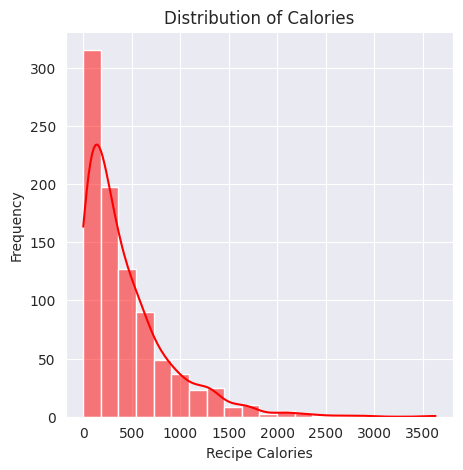

In [43]:
plt.figure(figsize=(5, 5))
sns.histplot(dataset['calories'], bins=20, kde=True, color='red')
plt.title('Distribution of Calories')
plt.xlabel('Recipe Calories')
plt.ylabel('Frequency')
plt.show()

### 'carbohydrate' Column

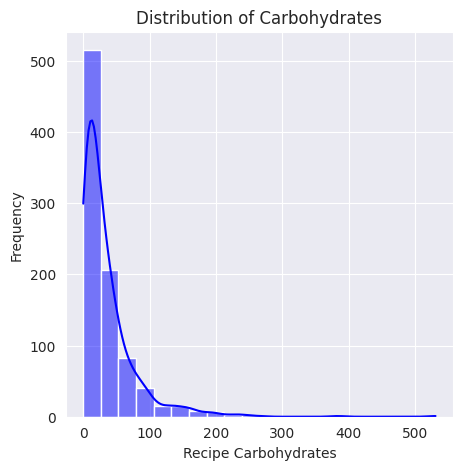

In [44]:
plt.figure(figsize=(5, 5))
sns.histplot(dataset['carbohydrate'], bins=20, kde=True, color='blue')
plt.title('Distribution of Carbohydrates')
plt.xlabel('Recipe Carbohydrates')
plt.ylabel('Frequency')
plt.show()

### 'sugar' Column

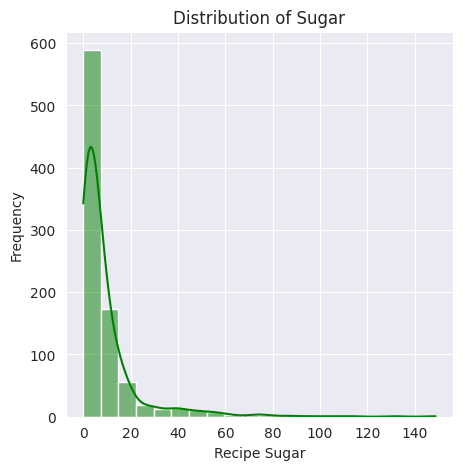

In [45]:
plt.figure(figsize=(5, 5))
sns.histplot(dataset['sugar'], bins=20, kde=True, color='green')
plt.title('Distribution of Sugar')
plt.xlabel('Recipe Sugar')
plt.ylabel('Frequency')
plt.show()

### 'protein' Column

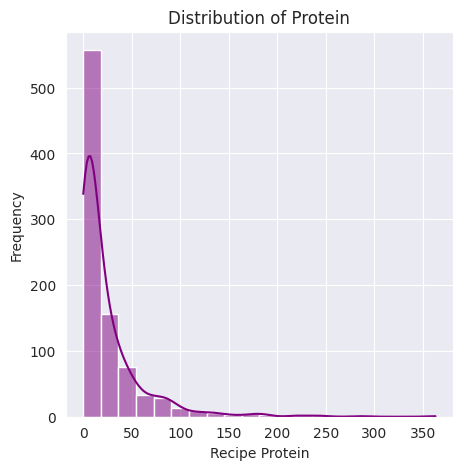

In [46]:
plt.figure(figsize=(5, 5))
sns.histplot(dataset['protein'], bins=20, kde=True, color='purple')
plt.title('Distribution of Protein')
plt.xlabel('Recipe Protein')
plt.ylabel('Frequency')
plt.show()

### 'category' Column

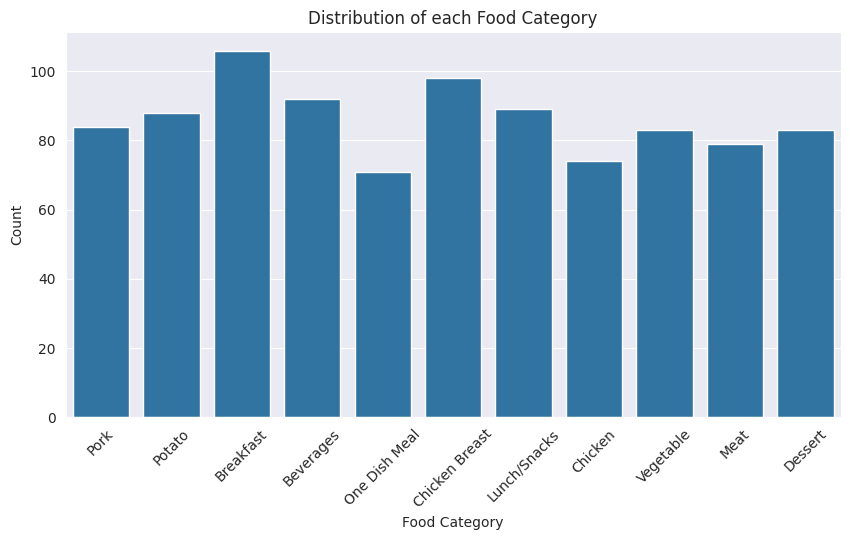

In [47]:
plt.figure(figsize=(10, 5))
sns.countplot(x='category', data=dataset)
plt.title('Distribution of each Food Category')
plt.xlabel('Food Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 'servings' Column

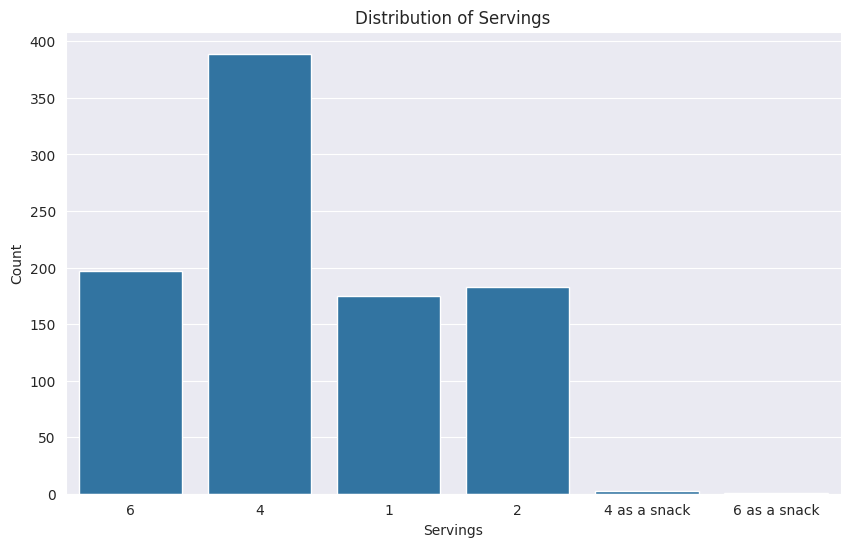

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='servings', data=dataset)
plt.title('Distribution of Servings')
plt.xlabel('Servings')
plt.ylabel('Count')
plt.show()

### 'high_traffic' Column

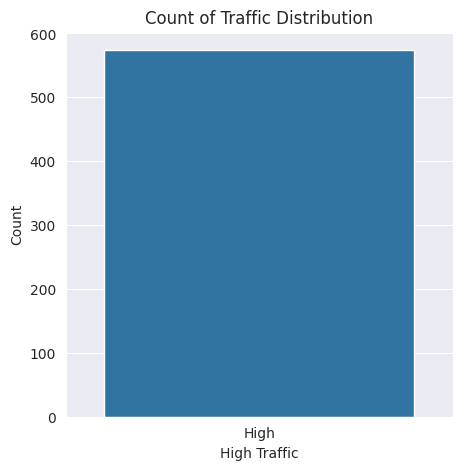

In [49]:
plt.figure(figsize=(5, 5))
sns.countplot(x='high_traffic', data=dataset)
plt.title('Count of Traffic Distribution')
plt.xlabel('High Traffic')
plt.ylabel('Count')
plt.show()

## 4. Data Validation and Cleaning
This data set has 947 rows and 8 columns before cleaning and validation. I have validated all variables and have not made any changes after validation. All the columns are just as described in the data dictionary:

- recipe: numeric values, unique identifier of recipe. No cleaning is needed.

- calories: numeric values, number of calories, contained missing values, which were imputed with the mean of this column within each category (food category).

- carbohydrate: numeric values, amount of carbohydrates in grams, contained missing values, which were imputed with the mean of this column within each category (food category).

- sugar: numeric values, amount of sugar in grams, contained missing values, which were imputed with the mean of this column within each category (food category).

- protein: numeric values, amount of protein in grams, contained missing values, which were imputed with the mean of this column within each category (food category).

- category: Character, type of recipe. Recipes are listed in one of ten possible groupings ('Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'). Before validation, there were 11 categories, the extra one was 'Chicken Breast' and it was changed to be of 'Chicken' category. There were no missing values and this column was converted to type 'category'.

- servings: number of servings for the recipe. Before validation, it was of object type (character). It was supposed to be of numeric type, so the two categories of '4 as a snack' and '6 as a snack' were replaced with 4 and 6, and then this column was converted to numeric (int) type. There were no missing values.

- high_traffic: character, if the traffic to the site was high when this recipe was shown, this is marked with “High”. So, when the traffic was not high, then this column has missing values, therefore, the missing values mean that the traffic was not high and hence they were imputed with "Not High". This column was converted to type 'category'.

### Overview of Missing Values

In [50]:
dataset.isnull().sum()

,0
recipe,0
calories,52
carbohydrate,52
sugar,52
protein,52
category,0
servings,0
high_traffic,373


### Data Cleaning

In [51]:
# Cleaning the 'calories' column
dataset['calories'] = dataset['calories'].fillna(dataset.groupby('category')['calories'].transform('mean'))

# Cleaning the 'carbohydrate' column
dataset['carbohydrate'] = dataset['carbohydrate'].fillna(dataset.groupby('category')['carbohydrate'].transform('mean'))

# Cleaning the 'sugar' column
dataset['sugar'] = dataset['sugar'].fillna(dataset.groupby('category')['sugar'].transform('mean'))

# Cleaning the 'protein' column
dataset['protein'] = dataset['protein'].fillna(dataset.groupby('category')['protein'].transform('mean'))

# Cleaning the 'category' column
dataset['category'] = dataset['category'].str.replace(' Breast', '')
dataset['category'] = dataset['category'].astype('category')

# Cleaning the 'servings' column
dataset['servings'] = dataset['servings'].str.replace(' as a snack', '')
dataset['servings'] = dataset['servings'].astype('int')

# Cleaning the 'high_traffic' column
dataset['high_traffic'] = dataset['high_traffic'].fillna('Not High')
dataset['high_traffic'] = dataset['high_traffic'].astype('category')

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      947 non-null    float64 
 2   carbohydrate  947 non-null    float64 
 3   sugar         947 non-null    float64 
 4   protein       947 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    category
dtypes: category(2), float64(4), int64(2)
memory usage: 46.9 KB


In [53]:
# Validating that there are 10 possible values for 'category' column
dataset['category'].nunique()

10

In [54]:
# Validating that there are 2 possible values for 'high_traffic' column
dataset['high_traffic'].nunique()

2

## 5. Exploratory Data Analysis

### Target Variable - High_Traffic
The food recipes collectively accounted for almost 60% of the high traffic on the website, and about 40% of non-high traffic.

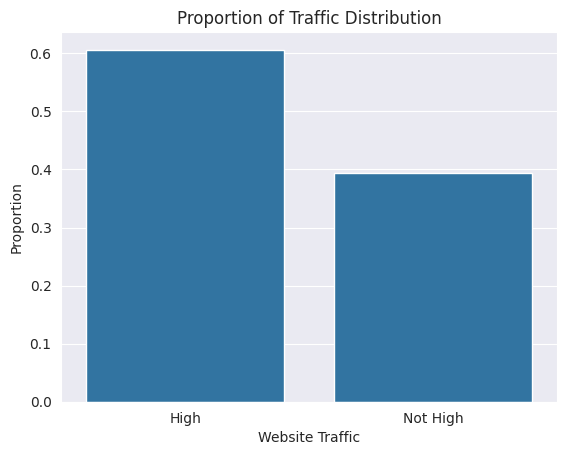

In [55]:
traffic_proportion = dataset['high_traffic'].value_counts(normalize=True).reset_index()
traffic_proportion.columns = ['high_traffic', 'proportion']

sns.barplot(x='high_traffic', y='proportion', data=traffic_proportion)

plt.xlabel('Website Traffic')
plt.ylabel('Proportion')
plt.title('Proportion of Traffic Distribution')
plt.show()

### Website Traffic Distribution for each Food Category
The plot below shows how the website traffic is distributed for each food category. It shows how the food categories 'Potato', 'Vegetable' and 'Pork' are the most popular ones, while 'Beverages', 'Breakfast' and 'One Dish Meal' being the least popular.

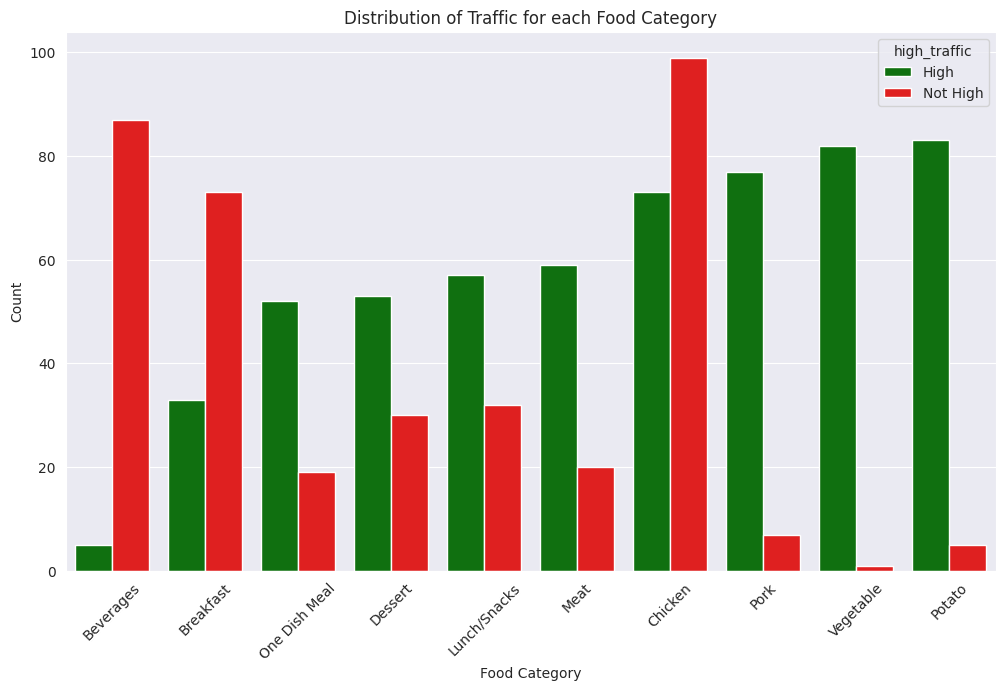

In [56]:
sorted_counts = dataset[dataset['high_traffic'] == 'High']['category'].value_counts().sort_values(ascending=True)

sorted_categories = sorted_counts.index.tolist()

dataset['category'] = pd.Categorical(dataset['category'], categories=sorted_categories, ordered=True)

plt.figure(figsize=(12, 7))
custom_palette = {'High': 'green', 'Not High': 'red'}
sns.countplot(x='category', hue='high_traffic', palette=custom_palette, data=dataset)

plt.xlabel('Food Category')
plt.ylabel('Count')
plt.title('Distribution of Traffic for each Food Category')
plt.xticks(rotation=45)

plt.show()

### Relationship between Food Category and Website Traffic via Heatmap
The heatmap shows that categories like Chicken, Pork, and Potato are strongly associated with high traffic, indicating these are popular on the site, while Beverages and Breakfast tend to have lower traffic, making them less popular. Other categories like Dessert, Lunch/Snacks, and Meat have a more balanced traffic distribution, suggesting moderate popularity.

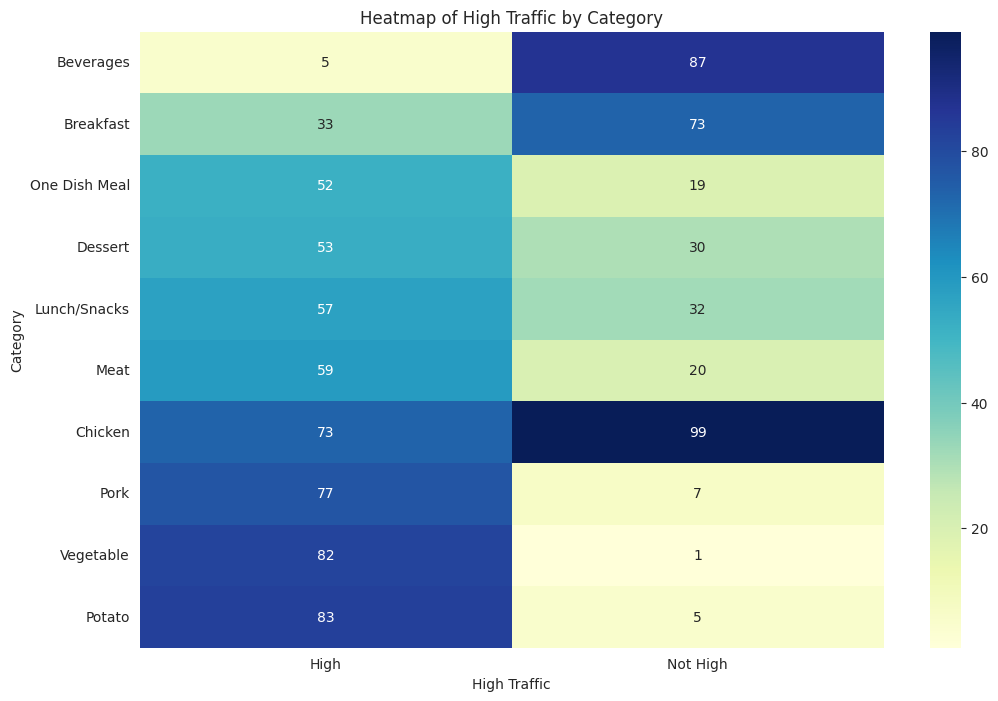

In [57]:
crosstab = pd.crosstab(dataset['category'], dataset['high_traffic'])
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of High Traffic by Category')
plt.xlabel('High Traffic')
plt.ylabel('Category')
plt.show()

### Correlation Heatmap
The correlation heatmap between the numeric features of the dataset shows that these variables are not at all correlated with each other, which indicates feature independence.

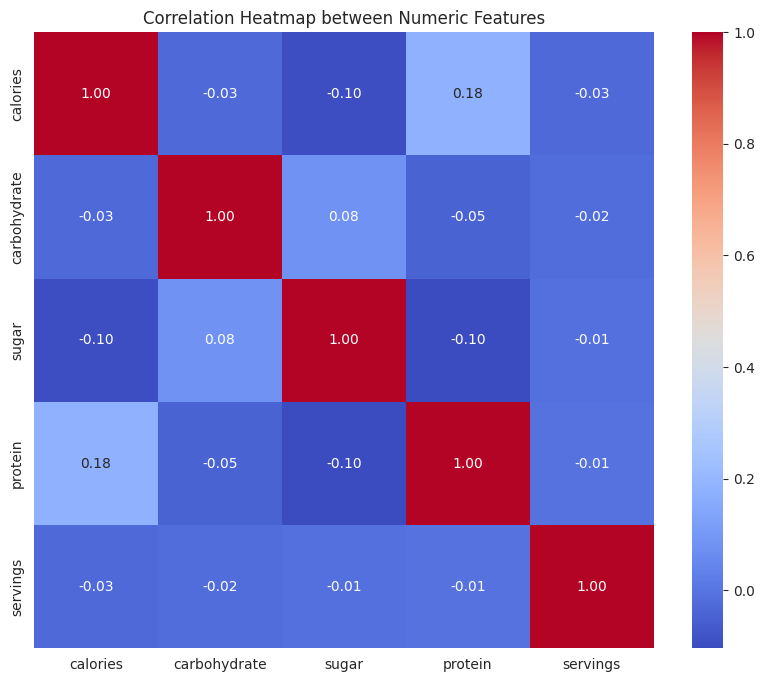

In [61]:
numeric_df = dataset.drop(columns=['recipe', 'category', 'high_traffic'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Numeric Features')
plt.show()

## 6. Data Preprocessing
To enable modelling, I've chosen calories, carbohydrate, proteins, sugar, servings, and category as the features and high_traffic as the target variable. Following steps will be taken to preprocess the dataset:

- Normalize the numeric features
- Convert the categorical variables into numeric features
- Split the data into a training set and a test set

In [62]:
# Encode the 'high_traffic' column as binary (1 for 'High', 0 for 'Not High')
dataset['high_traffic'] = dataset['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)

# Separate features and target
X = dataset.drop(columns=['high_traffic', 'recipe'])
y = dataset['high_traffic']

# Identify categorical and numeric features
numeric_features = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
categorical_features = ['category']

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 7. Model Fitting and Evaluation
This is a binary classification problem where the target is high_traffic. I am choosing the Logistic Regression model to establish a baseline. The comparison model I am choosing is the Random Forest model.

For evaluation, I'm choosing recall and F1 score. Recall and F1 score are vital because they focus on correctly identifying high-traffic recipes, minimizing missed opportunities (false negatives). Recall ensures most high-traffic recipes are captured, while F1 balances this with precision, making it a reliable measure of the model's effectiveness in driving site engagement.

### Logistic Regression Model

In [63]:
# Baseline Model: Logistic Regression
baseline_model = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(random_state=42))])

# Fit the baseline model
baseline_model.fit(X_train, y_train)

# Predictions for baseline model
y_pred_baseline = baseline_model.predict(X_test)
y_pred_proba_baseline = baseline_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics For Logistic Regression (Baseline Model)
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)

# Print results for Logistic Regression
print("Baseline Model (Logistic Regression):")
print(f"Precision: {precision_baseline:.4f}")
print(f"Recall: {recall_baseline:.4f}")
print(f"F1-Score: {f1_baseline:.4f}")
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_baseline))

Baseline Model (Logistic Regression):
Precision: 0.7974
Recall: 0.8188
F1-Score: 0.8079

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.68      0.65      0.66        88
           1       0.80      0.82      0.81       149

    accuracy                           0.76       237
   macro avg       0.74      0.73      0.74       237
weighted avg       0.75      0.76      0.75       237



### Random Forest Classifier

In [64]:
# Comparative Model: Random Forest
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Hyperparameter tuning for Random Forest (optional)
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Random Forest model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Predictions for Random Forest model
y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics For Random Forest (Comparative Model)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print results for Random Forest
print("\nComparative Model (Random Forest):")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Comparative Model (Random Forest):
Precision: 0.7722
Recall: 0.8188
F1-Score: 0.7948

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.66      0.59      0.62        88
           1       0.77      0.82      0.79       149

    accuracy                           0.73       237
   macro avg       0.72      0.70      0.71       237
weighted avg       0.73      0.73      0.73       237



### Models Comparison
According to our chosen evaluation metrics of Recall and F1 score, the baseline model, the Logistic Regression model, surprisingly performs better than the comparative model, the Random Forest Classifier. The baseline model has a recall of 0.8188 and the comparative model has a recall of 0.8188 as well, so both perform well and similar to correctly predict high traffic recipes at least 80% of the time. In terms of F1 score, the baseline model scores 0.8079 and the comparative model scores 0.7948. Hence, the logistic regression model without even being fine-tuned performs better than the comparative model.

## 8. Business Metrics
The business should monitor Recall to ensure high-traffic recipes are correctly identified and F1 Score to balance accuracy and false positives.


---


### Monitoring:
Track recall to capture most high-traffic recipes and F1 score to maintain prediction quality. Regularly evaluate these metrics on new data, along with overall site traffic and engagement.


---


### Initial Values:
Based on the current data, initial estimates are:

- **Recall**: ~ 0.82 (identifying nearly 82% of high-traffic recipes).
- **F1 Score**: ~ 0.81 (balancing precision and recall).

## 9. Final Summary and Recommendations:
The predictive model identifies high-traffic recipes with a recall of 0.82 and an F1 score of 0.81. To maximize site traffic and engagement, the business should:

- Fine-tune the logistic regression model to improve performance and metrics.
- Implement the Logistic Regression Model by deploying it on the website, for selecting homepage recipes.
- Retrain the Model with new data to adapt to trends.
- Monitor Recall and F1 Score regularly to maintain performance.
- Incorporate User Feedback for refining predictions.
- Based on the analysis, it is clear that the food categories 'Potato', 'Vegetable' and 'Pork' are the most popular ones and result in high traffic, so these should be used mostly as the homepage recipes.

These actions will help sustain high user engagement and increase subscription rates.